## 1. Import Libraries

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest


## 2. Read the raining Data

In [31]:
train = pd.read_csv(r"../data/train_set.csv")

In [32]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-06-06,Kolkata,Banglore,20:25:00,23:10:00,165,0.0,No Info,4804
1,Air India,2019-05-21,Delhi,Cochin,17:15:00,19:15:00,1560,2.0,No Info,11989
2,Jet Airways,2019-03-24,Kolkata,Banglore,21:10:00,16:20:00,1150,1.0,In-flight meal not included,10031
3,Indigo,2019-04-01,Delhi,Cochin,14:20:00,17:35:00,195,0.0,No Info,4729
4,Jet Airways,2019-03-15,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,No Info,8040
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-05-09,Kolkata,Banglore,09:35:00,23:35:00,840,1.0,No Info,12121
6691,Jet Airways,2019-05-18,Kolkata,Banglore,09:35:00,19:10:00,575,1.0,No Info,13067
6692,Jet Airways,2019-05-24,Kolkata,Banglore,20:00:00,23:35:00,1655,1.0,In-flight meal not included,10844
6693,Multiple Carriers,2019-06-03,Delhi,Cochin,10:35:00,19:00:00,505,1.0,No Info,10877


In [33]:
# will check the data types 
# will see if they are valid or not 
# since based on types of variable will do analysis (numeric/categoric/date-time)

train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [34]:
# will convert date_of_journey, dep_time, arrival_time from object ---> datetime

train = train.assign(**{
    col: pd.to_datetime(train.loc[:,col],dayfirst=True)
    for col in ["date_of_journey","dep_time","arrival_time"]
})

In [35]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

## 3. High-level Summary of Data

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6695 non-null   object        
 1   date_of_journey  6695 non-null   datetime64[ns]
 2   source           6695 non-null   object        
 3   destination      6695 non-null   object        
 4   dep_time         6695 non-null   datetime64[ns]
 5   arrival_time     6695 non-null   datetime64[ns]
 6   duration         6695 non-null   int64         
 7   total_stops      6695 non-null   float64       
 8   additional_info  6695 non-null   object        
 9   price            6695 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 523.2+ KB


In [37]:
# for numeric variables 
train.describe(include='number')

,duration,total_stops,price
count,6695.000000,6695.000000,6695.000000
mean,634.283794,0.801792,9019.358626
std,502.476165,0.655010,4557.219221
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5222.500000
50%,510.000000,1.000000,8151.000000
75%,925.000000,1.000000,12284.000000
max,2860.000000,4.000000,62427.000000


- in duration column by observing min max we can see in duration columns there are extreme values 
- total stops is more of a categorical variables so it doesnt make sense to consider it as a numeric variable so will consider it as categorical


In [38]:
# For Categorical Variables

#train.describe(include="O")

(
    train
    .assign(total_stops = train["total_stops"].astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,6695,6695,6695,6695.0,6695
unique,8,5,6,5.0,8
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,2381,2776,2776,3643.0,5222


- in airline we have 8 uniques values, the most frequent value is jet airways and it occurs 2381 times of 6695
- so with this we can get idea of all the categorical coilumns 

## 4. High-Level analysis of Missing Values



In [39]:
eda_helper_functions.missing_info(train)


,count,percentage
variable,,


- our dataset dont have any missing values hence its empty

In [40]:
#eda_helper_functions.plot_missing_info(train)

In [41]:
# matrix method for finding missing values
#!pip install missingno --quiet

## 5. High-Level analysis of outliers


- will use IsolationForest
- in our dataset will create a seperate column that will indicate it is outlier or not

In [42]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [43]:
(
    train
    .assign(outlier=forest.fit_predict(train
                                      .drop(columns="price")
                                      .select_dtypes(include="number")))
    .query("outlier == -1")
    #.duration
    #.describe()
)

# we are making a new feature called outlier
# we are using a isolation forest algorithm on training data
# then will drop price column
# will just use input numeric feature
# reults we can see the last columns are 1 or -1
# now we want the values which are outlier for which will use query method to filter our dataframe     


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
1,Air India,2019-05-21,Delhi,Cochin,2024-07-06 17:15:00,2024-07-06 19:15:00,1560,2.0,No Info,11989,-1
2,Jet Airways,2019-03-24,Kolkata,Banglore,2024-07-06 21:10:00,2024-07-06 16:20:00,1150,1.0,In-flight meal not included,10031,-1
3,Indigo,2019-04-01,Delhi,Cochin,2024-07-06 14:20:00,2024-07-06 17:35:00,195,0.0,No Info,4729,-1
4,Jet Airways,2019-03-15,Mumbai,Hyderabad,2024-07-06 10:20:00,2024-07-06 11:50:00,90,0.0,No Info,8040,-1
7,Spicejet,2019-05-18,Kolkata,Banglore,2024-07-06 15:05:00,2024-07-06 20:20:00,315,1.0,No Info,4963,-1
...,...,...,...,...,...,...,...,...,...,...,...
6685,Jet Airways,2019-03-15,Mumbai,Hyderabad,2024-07-06 10:20:00,2024-07-06 11:50:00,90,0.0,In-flight meal not included,4160,-1
6686,Indigo,2019-05-03,Chennai,Kolkata,2024-07-06 22:05:00,2024-07-06 00:25:00,140,0.0,No Info,5277,-1
6687,Indigo,2019-03-03,Mumbai,Hyderabad,2024-07-06 20:05:00,2024-07-06 21:35:00,90,0.0,No Info,5232,-1
6688,Jet Airways,2019-06-24,Delhi,Cochin,2024-07-06 19:15:00,2024-07-06 19:00:00,1425,1.0,In-flight meal not included,10262,-1


## 6. Pair Plots

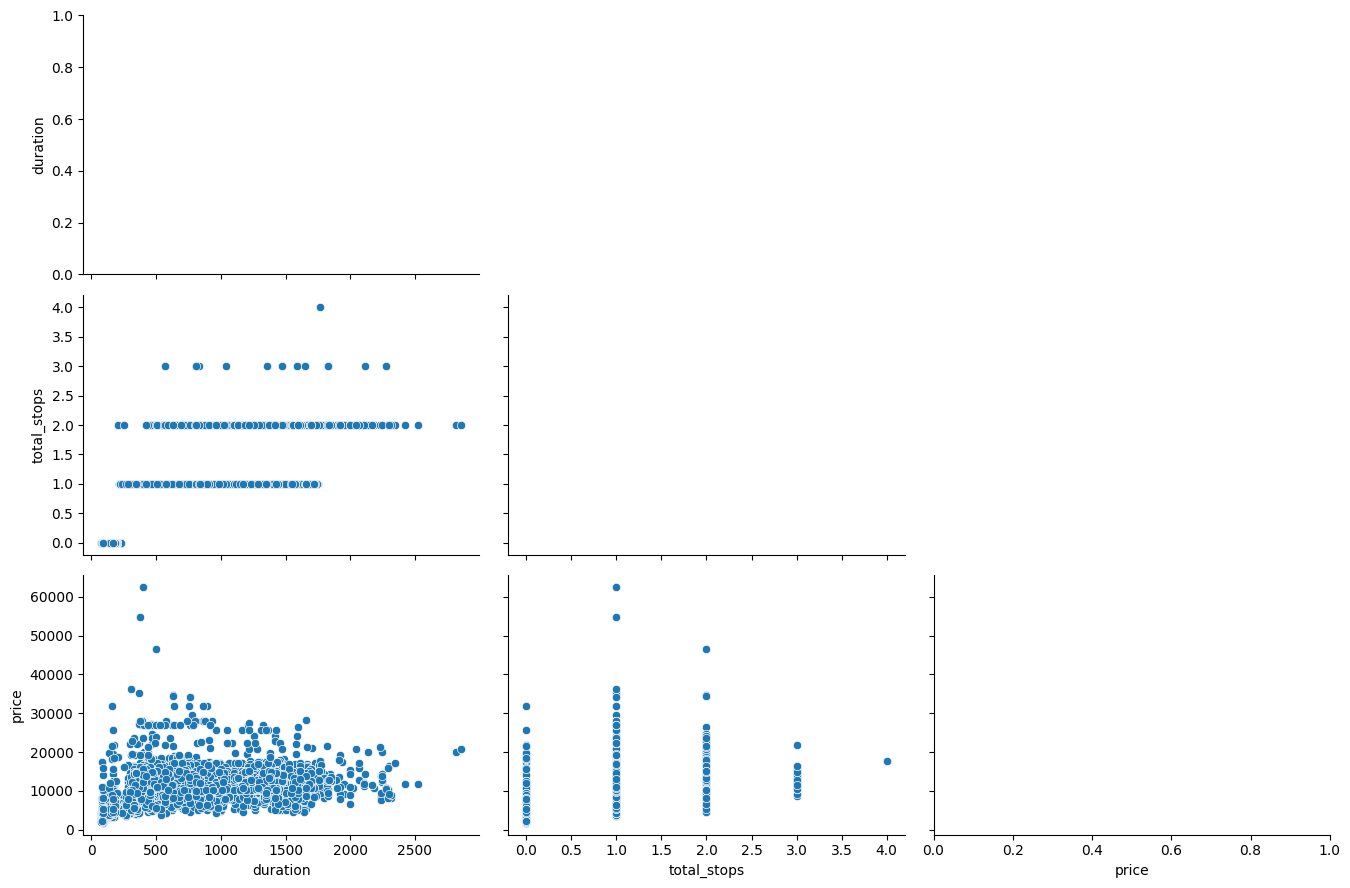

In [44]:
# Pair Plots will give us good understanding of our numeric variables

eda_helper_functions.pair_plots(train)

- **pair plot is a symmetric graph so to avoid the repeated information they are just showing the lower half (in code for this we kept corner = True)**
- numeric variable we had was total stop, duration and price
- so for each combination it made a pair plot
- we can see a linear relationship between price and duration longer the flights higher the price  
- if we see duration vs total stops we can see if total stops are 0 the duration is very small


## 7. Correlation Analysis 

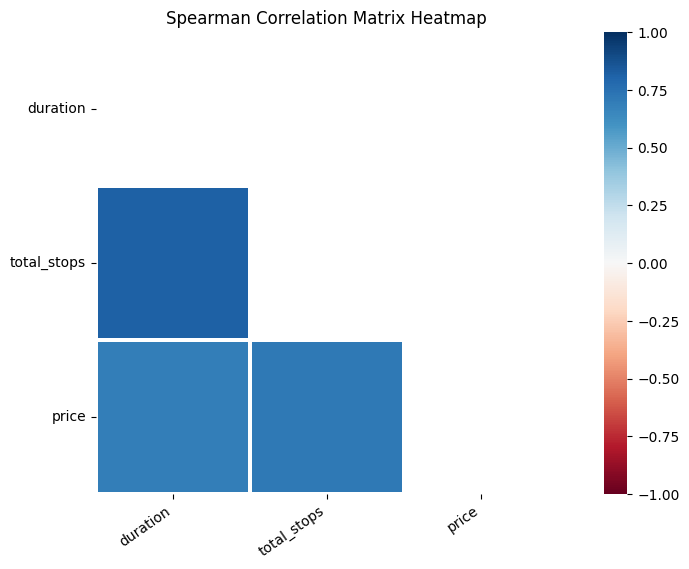

In [45]:
# Multicollinearity is not a good idea 
# hence its imp to understand correlation

eda_helper_functions.correlation_heatmap(train)

In [46]:
train.corr(method="spearman", numeric_only=True)

,duration,total_stops,price
duration,1.000000,0.820204,0.693770
total_stops,0.820204,1.000000,0.715038
price,0.693770,0.715038,1.000000


- same thing here also pair wise numeric feature hiding the upper half and showing only the lower half since same info is convey in top half as well
- plot shows high correlation between price vs duration, price vs total_stops
- as duration increases price increases, as stops increases the price also increases
- but if we see the pair plots in which total stop vs price we can see for 0 stops largest price is somewhere arounf 30k but for stop 1 and 2 its much more  so because of this extreme values the correlation value may have got influenced by that
- so just looking at correlation map we can ssume that total stops vs price are highly correlated but if we see the pair plot there are some data points in stop 2 and 3 which has extreme value due to which the correlation value got influenced


In [47]:
# train= (
#     train
#     .assign(total_stops = train["total_stops"].astype(object))
#     #.describe(include="O")
# )

D:\SAURABH\ANACONDA\ANACONDA\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


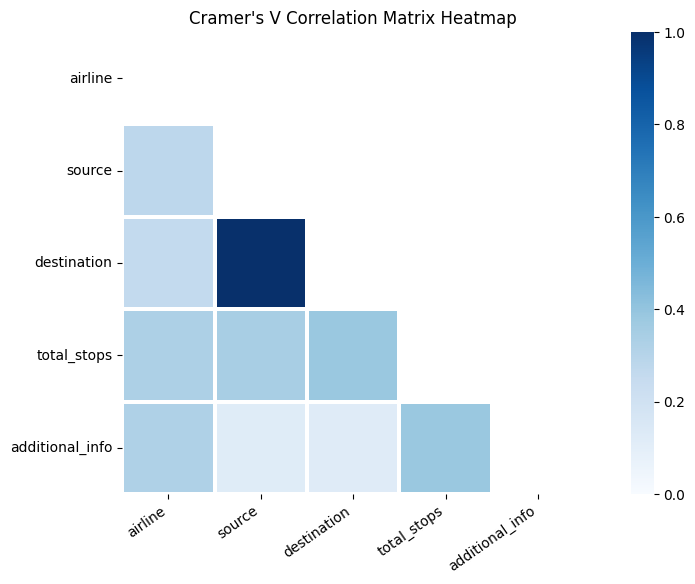

In [49]:
# will see correlation for categorical features

# eda_helper_functions.cramersV_heatmap(train)

(
    train
    .assign(total_stops=train["total_stops"].astype(object))
    .pipe(eda_helper_functions.cramersV_heatmap)
)


 ## 8. Detailed Analysis

In [50]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 Airline

In [51]:
train.airline


0                  Indigo
1               Air India
2             Jet Airways
3                  Indigo
4             Jet Airways
              ...        
6690          Jet Airways
6691          Jet Airways
6692          Jet Airways
6693    Multiple Carriers
6694            Air India
Name: airline, Length: 6695, dtype: object

- its a categorical feature
- we have a function for that will use it to get summary

In [58]:
eda_helper_functions.cat_summary(train,"airline")


# Categories Distribution: we are combining below 2 methods
#train.airline.value_counts()
#train.airline.value_counts(normalize = True)

0                  Indigo
1               Air India
2             Jet Airways
3                  Indigo
4             Jet Airways
              ...        
6690          Jet Airways
6691          Jet Airways
6692          Jet Airways
6693    Multiple Carriers
6694            Air India
Name: airline, Length: 6695, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,
count,6695
unique,8
top,Jet Airways
freq,2381


,count,percentage
category,,
Jet Airways,2381,0.355639
Indigo,1275,0.190441
Air India,1100,0.164302
Multiple Carriers,747,0.111576
Spicejet,534,0.079761
Vistara,307,0.045855
Air Asia,219,0.032711
Goair,132,0.019716


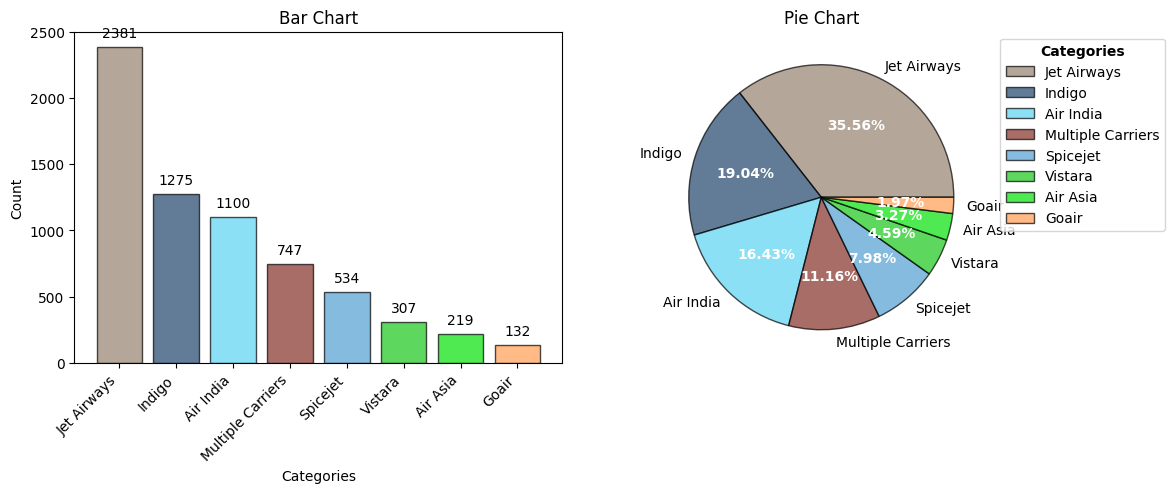

In [67]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False) #, k=3)

- On the left, we can see a simple bar chart (count plot).
- On the right, we have the same information presented as a pie chart.
- At the bottom, we have a word cloud. It represents the category, and the size of each word corresponds to its frequency.
- word cloud would helps us in case where we have highly cardinal feature, if we have text data then we can learn which word has occured frequently or if we have high cardinality column then we can see which value occurs more frequently

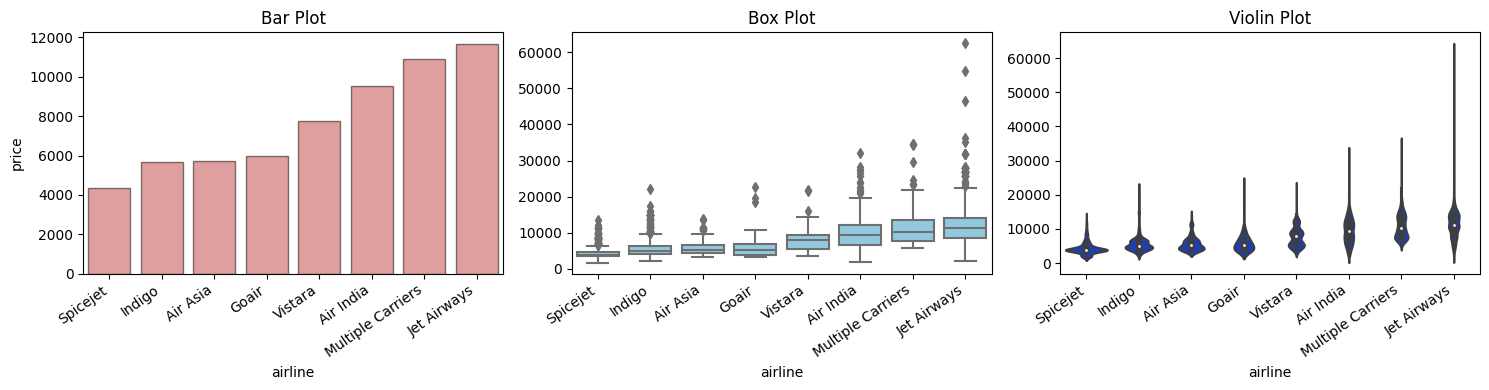

In [69]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var="price",
    cat_var="airline"
)

**Bar Plot**

- The bar plot shows that for SpiceJet, the average price is around 4000.
- For Indigo, the average price is around 6000, and similarly for other categories.
- From the bar plot, we can clearly see that each airline has a different average price, displaying an increasing trend. Therefore, we can conclude that the airline is a good feature for predicting prices as prices vary based on the airline.

**Box Plot**

- In the bar plot, we get the mean of each category.
- In the box plot, we can see the distribution of values for each category.
- The box plot shows the 25th percentile, median, 75th percentile, and the extreme ends.
- For Jet Airways, the diamonds in the box plot indicate potential outliers. These may or may not be true outliers, but they are potential outliers that need to be analyzed further.
- Observing the box for Jet Airways, the box represents the interquartile range (IQR) from the 25th percentile (Q1) to the 75th percentile (Q3), which means 50% of the observations fall within the range of 10000 to 15000. Anything above this range is considered a potential outlier. There are points for Jet Airways with prices around 40000, 50000, and 60000, indicating potential outliers.

**Violin Plot**

- The violin plot combines KDE (Kernel Density Estimation) plot and box plot.
- The box plot helps to show extreme values.
- The violin plot helps to analyze the shape of the distribution to determine if the values are skewed to the left, right, or symmetric.
- For SpiceJet, the distribution looks almost normal but is right-skewed, indicating that the majority of flights are cheap, with very few extreme values, causing the skewness towards the right.
- For each airline category, the shape of the distribution is completely different, suggesting that the airline is a good predictor of price.

These observations suggest that the airline feature significantly impacts flight prices and is a valuable predictor in the analysis.


In the above graphs, we observed a relationship between airline and prices. To confirm this relationship, we will perform hypothesis testing.


In [71]:
eda_helper_functions.num_cat_hyp_testing(train, "price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 536.6699869010923
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3021.9813851681556
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


### Report Observations

- We are performing two tests: ANOVA and Kruskal-Wallis.

**What is the ANOVA test?**
- Given our categorical feature (airline), for each category, it calculates the mean value of the price. It then compares these means.
- If there is a significant difference between the means, it indicates a good association between the variables. If there is no difference between the means, it indicates no valid association. This is what the ANOVA test does.

**What is the Kruskal-Wallis test?**
- It calculates the median value and tests the hypothesis based on the median values.
- We use both tests to ensure clarity; if both tests give the same conclusion, it reinforces the results.

**ANOVA Test Result**: At a 5% significance level for our training data, we have enough evidence to conclude that the means of the categories are different. Therefore, we reject the null hypothesis and conclude that price and airline are associated with each other.


### Multivariate Analysis with seaborn.FacetGrid

For multivariate analysis, we use `seaborn.FacetGrid`. Seaborn has this function called `FacetGrid` which is very helpful for multivariate analysis.

- We have airline and prices, so in bivariate analysis, we created bar charts to show the relationship between these two variables.
- Using `FacetGrid`, we can enhance these bar charts to show the relationship between price, airline, and destination.
- This allows us to visualize how the price varies not only with the airline but also with the destination.


In [95]:
def plot_facet_grid(data, col_name, col_wrap=3, height=4, aspect=1.2):
    airline_grid = sns.FacetGrid(
        data=data,
        col_wrap=col_wrap,
        col=col_name,
        height=height,
        aspect=aspect,
        sharey=True
    )
    
    airline_grid.map(sns.barplot, "airline", "price", order=data.airline.unique())
    
    for ax in airline_grid.axes[3:]:
        eda_helper_functions.rotate_xlabels(ax)
    
    return airline_grid

# #airline_grid.axes[3:] 
# for ax in airline_grid.axes[3:]:
#     eda_helper_functions.rotate_xlabels(ax)

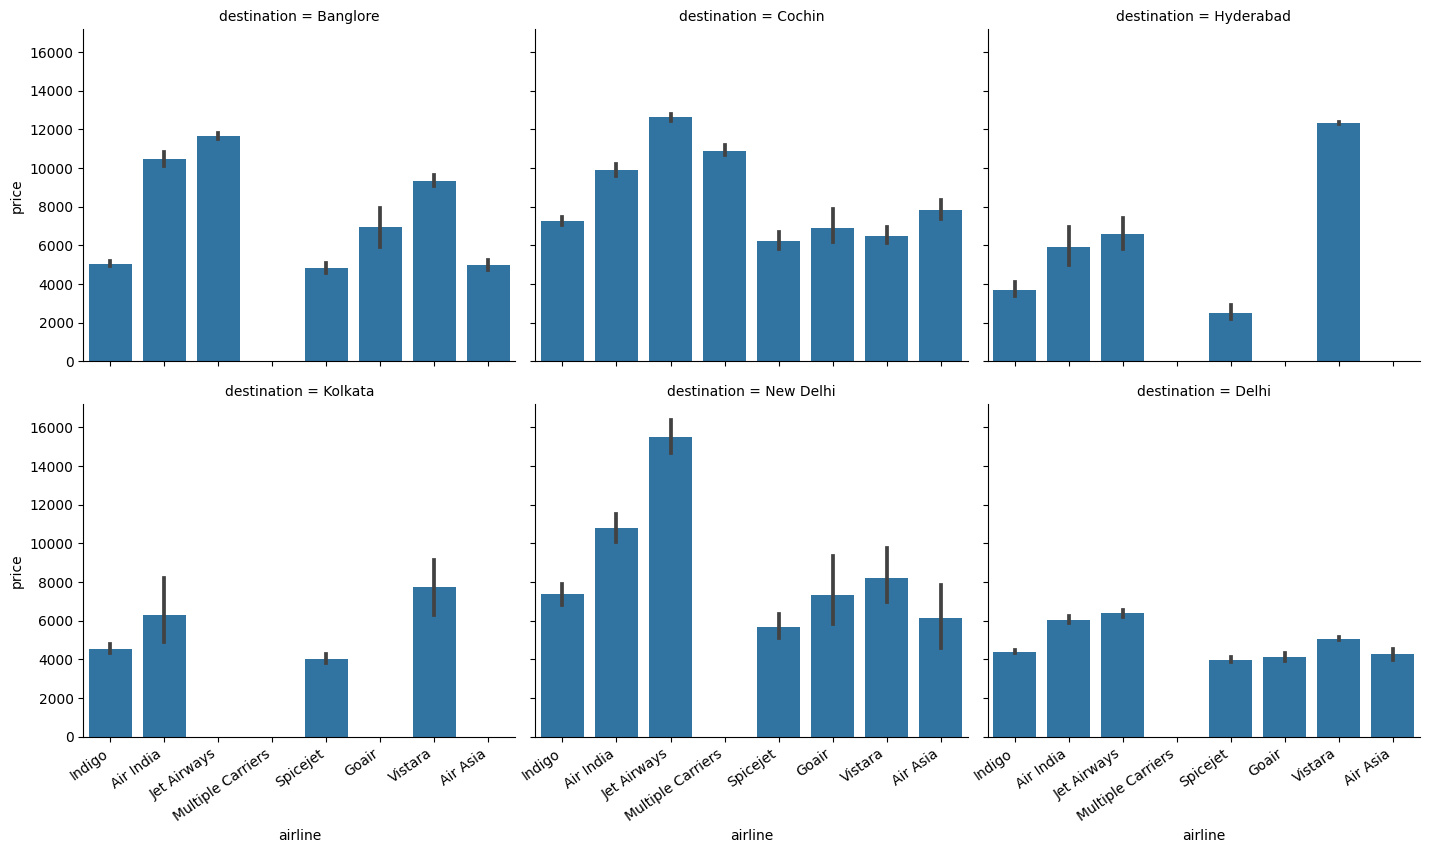

In [96]:
# Plot by destination
plot_facet_grid(train, "destination")

### Explanation
- **Grid of 6 Axes**: The grid is composed of 6 axes because the "destination" column has 6 unique values.
- **Col_wrap=3**: Setting `col_wrap=3` ensures that there are 3 plots in each row, preventing the grid from appearing cluttered.
- **Relationship Between Airline and Price**: In each axis (plot), we want to visualize the relationship between "airline" and "price".
- **Mapping the Barplot**: We use `airline_grid.map` to map a barplot onto this figure, showing the relationship between "airline" and "price" for each destination.
- **Order Parameter**: By specifying `order=train.airline.unique()`, we ensure that all airlines are displayed in each plot, even if they don't operate in certain destinations. Without this, bars for airlines that don't operate in specific destinations wouldn't be shown.

**will do same for source column**


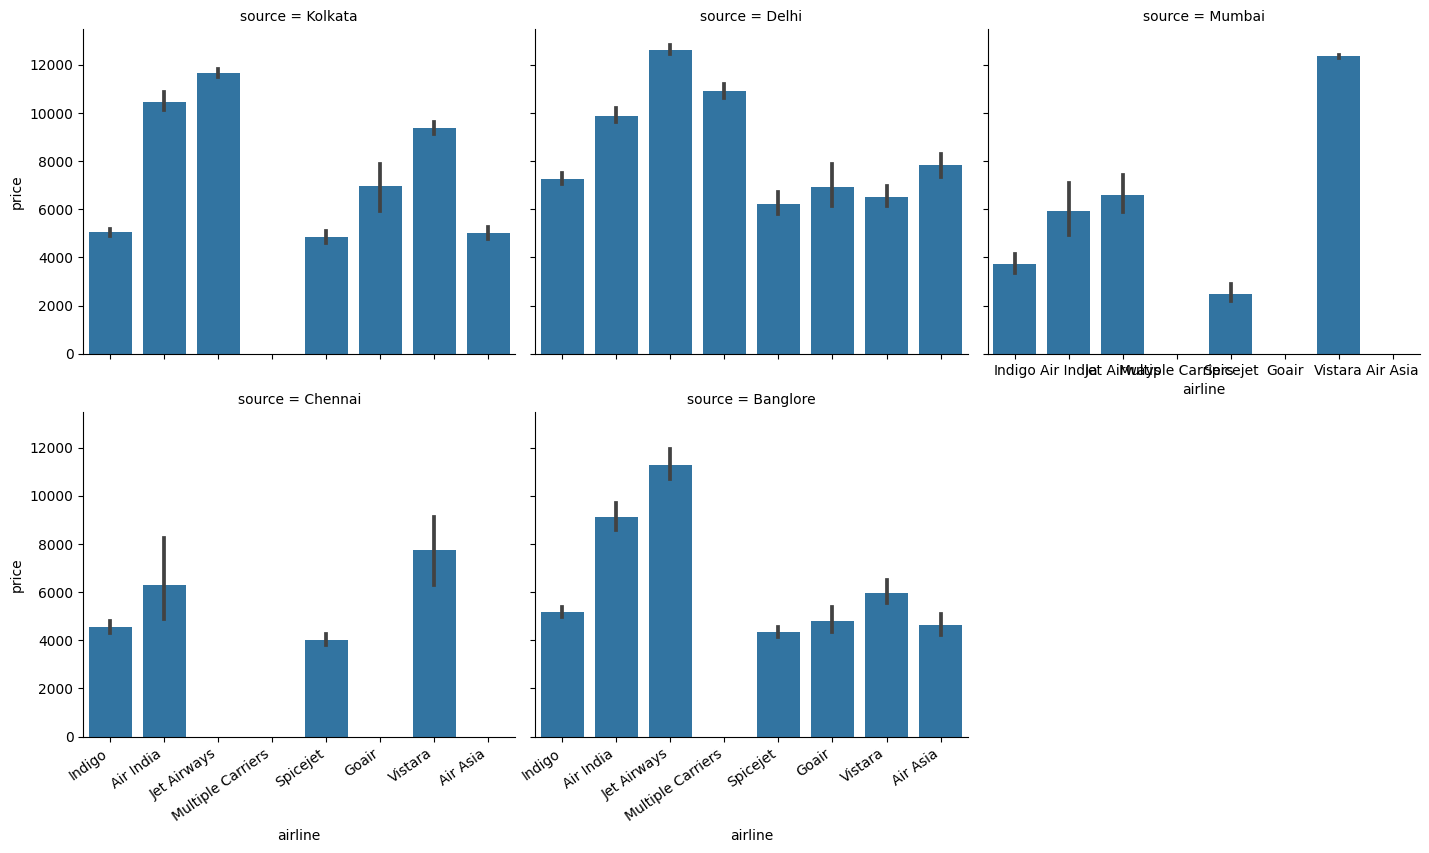

In [97]:
plot_facet_grid(train, "source")
